In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload
import ferel
import numpy as np

In [2]:
# Generate toy data sampled uniformly from a cube.
X, y, normal, b = ferel.toy_data_generation.gen_toy_data_uniform(
    n_samples=5000, n_str_rel=2, n_weak_rel=0, n_irrel=2)

Swapping 563 1 to -1 and 420 -1 to 1.
Swapping 190 1 to -1 and 181 -1 to 1.


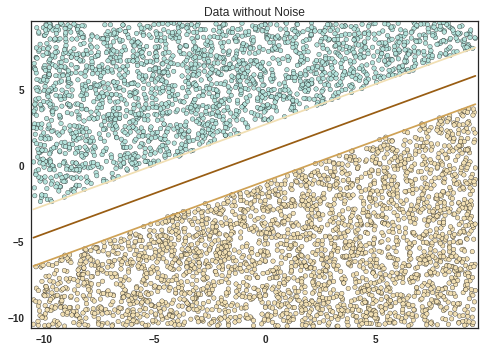

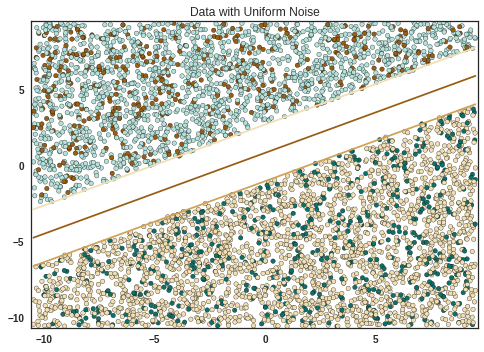

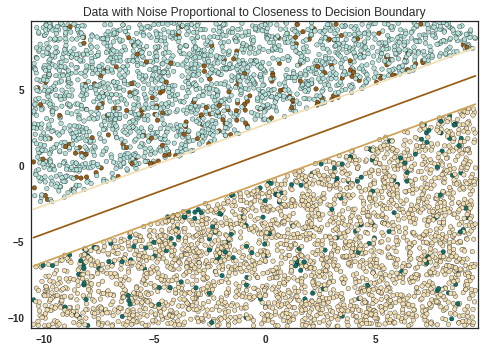

In [3]:
# Plot toy data using one of our special plotting functions.
ax = ferel.plotting.scatter_2d_hyperplane(X, y, 0, 1, normal, b)
ax.set_title('Data without Noise')

y_with_noise_1 = ferel.toy_data_generation.add_label_noise_uniform(y, 0.2)
ax = ferel.plotting.scatter_2d_hyperplane(X, y_with_noise_1, 0, 1, normal, b)
ax.set_title('Data with Uniform Noise')

y_with_noise_2 = ferel.toy_data_generation.add_label_noise_border(X, y, normal, b, 0.2)
ax = ferel.plotting.scatter_2d_hyperplane(X, y_with_noise_2, 0, 1, normal, b)
ax.set_title('Data with Noise Proportional to Closeness to Decision Boundary');

In [4]:
# Perform a z-score transformation on the data ( X_scaled = (X - mean(X))/std(X) )
X = X - np.mean(X)
scaling = np.std(X,0)
X = X / scaling
normal = normal * scaling

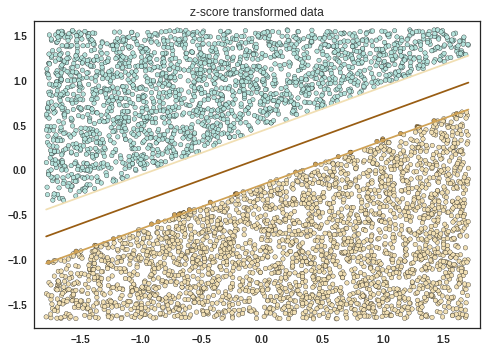

In [5]:
# Plot again.
ax = ferel.plotting.scatter_2d_hyperplane(X, y, 0, 1, normal, b)
ax.set_title('z-score transformed data')

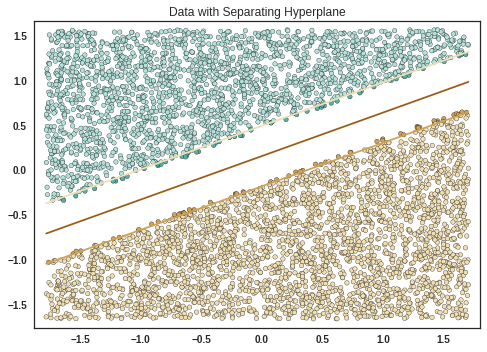

In [6]:
# Find seperating hyperplane.
hyp, offset, slack, acc, C = ferel.ferel.find_hyp_ridge(X, y, C=0.1)

# Plot data together with the determined separating hyperplane.
ax = ferel.plotting.scatter_2d_hyperplane(X, y, 0, 1, hyp, offset)
ax.set_title('Data with Separating Hyperplane');

In [7]:
# Investigate found separating hyperplane
print(
    'Found hyperplane has {} intrusions from label 1 and {} intrusions from label -1. \n \
Slack variable losses sum to {} and {}, respectively. \n \
The accuracy on the training data is {} with {} misclassifications.'.format(
        np.count_nonzero(y[np.logical_and(y == 1, slack > 0)]),
        np.count_nonzero(y[np.logical_and(y == -1, slack > 0)]),
        np.sum(slack[y == 1]),
        np.sum(slack[y == -1]), acc, np.count_nonzero(slack[slack > 1])))

Found hyperplane has 61 intrusions from label 1 and 57 intrusions from label -1. 
 Slack variable losses sum to 3.299741364056063 and 3.0366060889245317, respectively. 
 The accuracy on the training data is 1.0 with 0 misclassifications.


Original weight vector L1 is 4.418824301413663 and slack variable sum is 6.336347452980595.
Found min weight 1.423848907423626 for feature 0 in vector with L1-norm 4.41882430141171. Slack sum is 6.336347452979015.
Found max weight 1.4491408728874413 for feature 0 in vector with L1-norm 4.418824301409271. Slack sum is 6.336347452963784.
Found min weight 2.9686468223385387 for feature 1 in vector with L1-norm 4.418824301412724. Slack sum is 6.336347452979784.
Found max weight 2.994975393305092 for feature 1 in vector with L1-norm 4.418824301412988. Slack sum is 6.336347452973495.
Found min weight 5.933498879932334e-14 for feature 2 in vector with L1-norm 4.418776477741016. Slack sum is 6.3362959682235545.
Found max weight 0.01012527935967206 for feature 2 in vector with L1-norm 4.41882430141162. Slack sum is 6.336347452971353.
Found min weight 1.8057925356561027e-13 for feature 3 in vector with L1-norm 4.418742388680131. Slack sum is 6.336296150909256.
Found max weight 0.0117567825233687

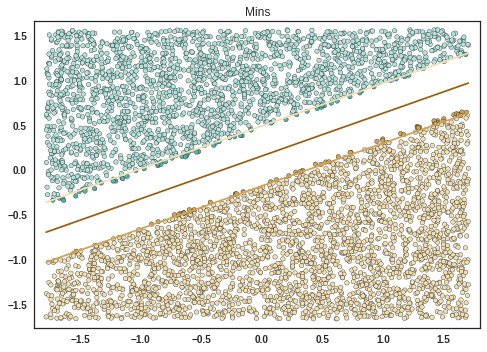

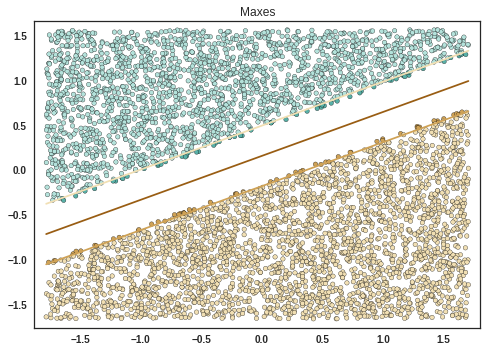

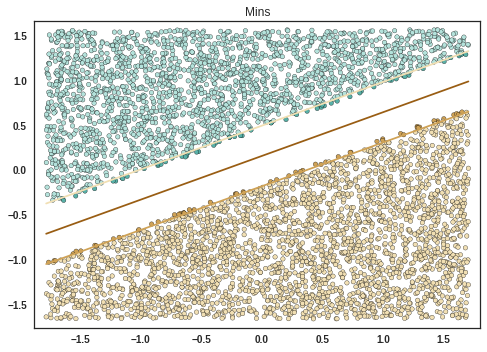

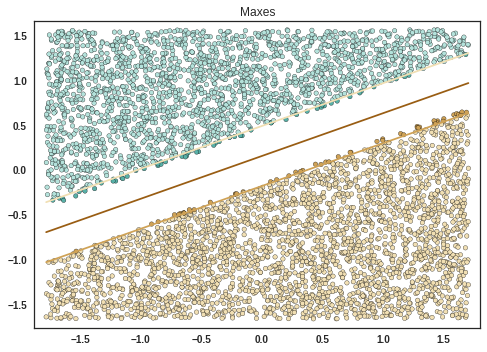

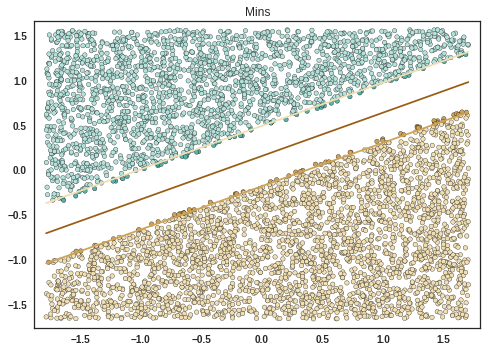

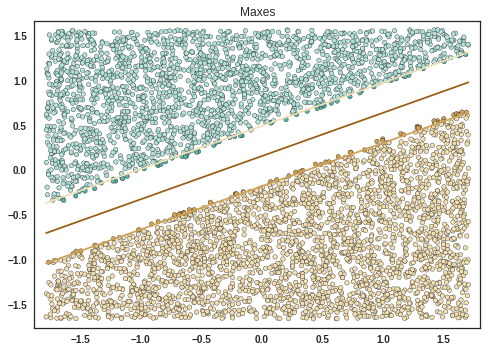

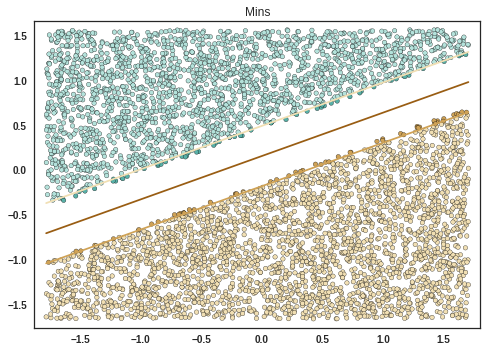

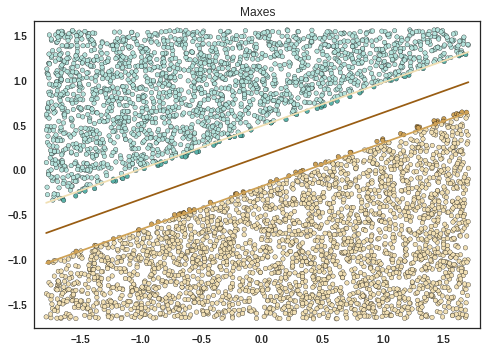

In [8]:
# Calculate relevance bounds.
omega, xp, b = ferel.ferel.find_relevances(X, y, hyp, offset, slack, C)
# Plot the hyperplanes found by the optimization problems.
for i in range(X.shape[1]):
    ax = ferel.plotting.scatter_2d_hyperplane(X, y, 0, 1, omega[:,2*i], b[2*i])
    ax.set_title('Mins')
    ax = ferel.plotting.scatter_2d_hyperplane(X, y, 0, 1, omega[:,2*i+1], b[2*i+1])
    ax.set_title('Maxes')